In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.neighbors import NearestNeighbors as NN
%matplotlib inline

# 7.2)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


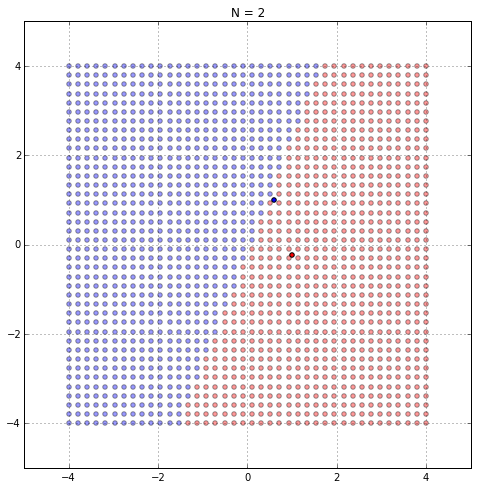

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:50: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:51: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


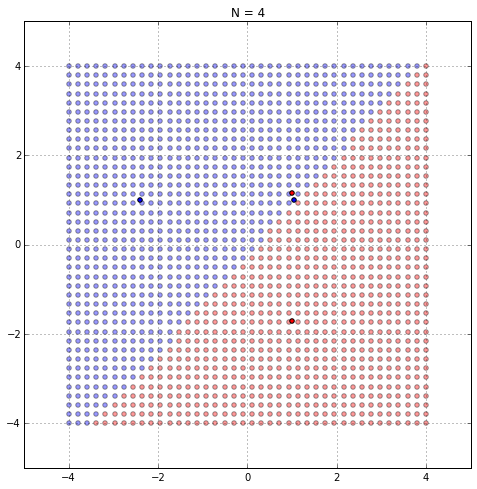

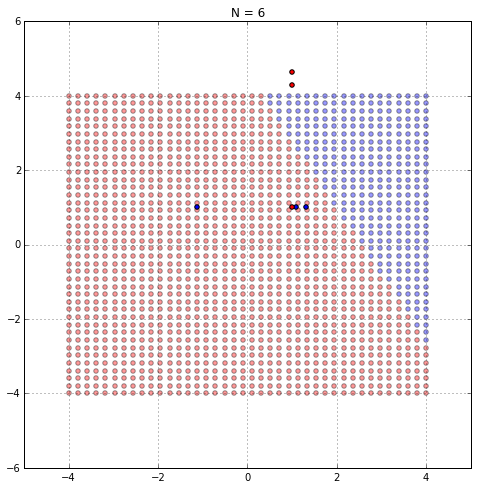

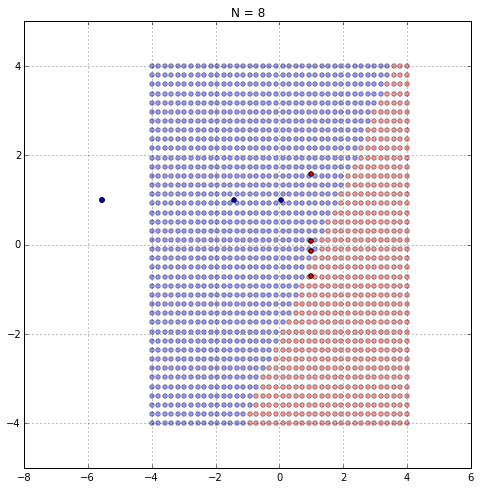

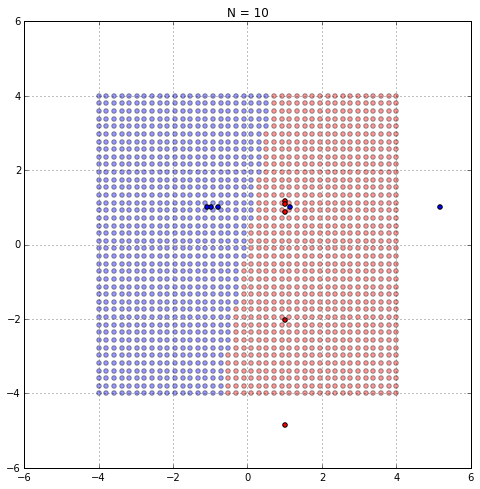

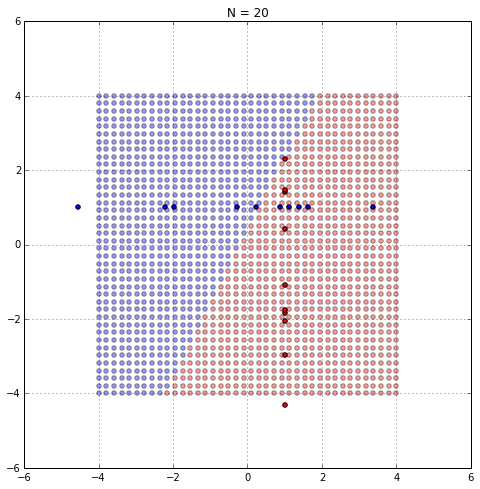

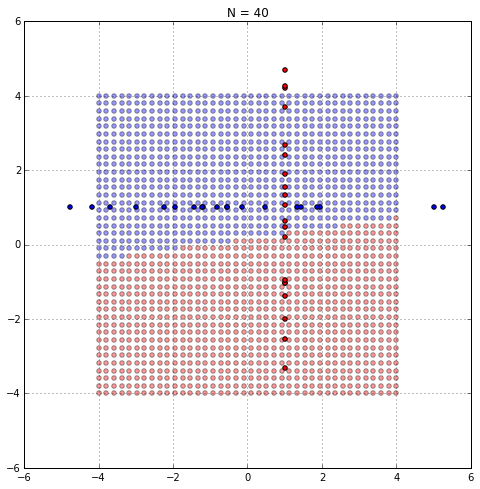

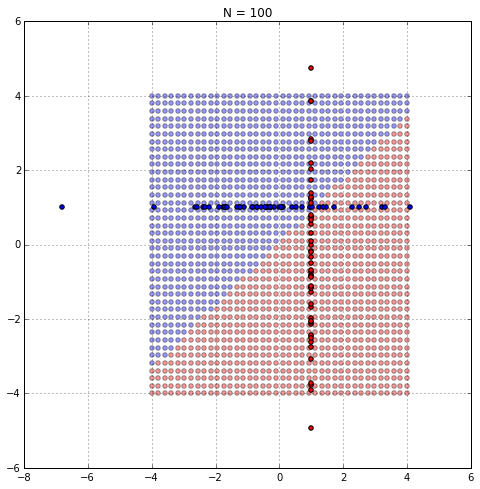

In [3]:

def classification(N,plotflag):
    # generate training data
    X1 = np.vstack([np.random.normal(0, 2, N/2), np.ones(N/2)])
    X2 = np.vstack([np.ones(N/2), np.random.normal(0, 2, N/2)])
    X = np.hstack([X1,X2])
    Y = np.hstack([np.ones(N/2)*-1.0,np.ones(N/2)])

    # calculate weights, bias
    def least_squares(X,Y):
        A = np.column_stack((np.ones(X[0,:].size), X[0,:], X[1,:]))
        return np.linalg.lstsq(A,Y)[0]
    c = least_squares(X,Y)

    # plot regression results
    if plotflag:
        x1 = np.linspace(-4, 4, 40)
        x2 = np.linspace(-4, 4, 40)
        y = np.sign(c[0]*x1 + c[1]*x2 + c[2])

        plt.figure(figsize=(8,8))
        for i in range(len(x1)):
            for j in range(len(x2)):
                if np.sign(-c[2]*x1[i] - c[1]*x2[j] - c[0])==1:
                    plt.scatter(x1[i],x2[j],c='r',alpha = 0.4)
                else:
                    plt.scatter(x1[i],x2[j],c='b',alpha = 0.4) 
        for i in range(N):
            if Y[i]==1:
                plt.scatter(X[0,i],X[1,i],c='r')
            else:
                plt.scatter(X[0,i],X[1,i],c='b') 
        plt.grid()
        plt.title('N = %s' %N)
        plt.show()

    # calculate training error
    y_train = np.zeros(N)
    right = 0
    for i in range(N):
        y_train[i] = np.sign(-c[2]*X[0,i] - c[1]*X[1,i] - c[0])
        if y_train[i] == Y[i]:
            right +=1
    success_rate_train = right/N*100

    #print('succes (train):',success_rate_train)

    # generate 1000 test data points
    Ntest = 1000
    X1test = np.vstack([np.random.normal(0, 2, Ntest/2), np.ones(Ntest/2)])
    X2test = np.vstack([np.ones(Ntest/2), np.random.normal(0, 2, Ntest/2)])
    Xtest = np.hstack([X1test,X2test])
    Ytest = np.hstack([np.ones(Ntest/2)*-1.0,np.ones(Ntest/2)])

    # calculate test error
    y_test = np.zeros(Ntest)
    right = 0
    for i in range(Ntest):
        y_test[i] = np.sign(-c[2]*Xtest[0,i] - c[1]*Xtest[1,i] - c[0])
        if y_test[i] == Ytest[i]:
            right +=1
    success_rate_test = right/Ntest*100

    #print('succes (test):',success_rate_test)
    
    return c[0], c[1], success_rate_train, success_rate_test

########################################################

Nsimulate = 50
N = np.array([2,4,6,8,10,20,40,100])
r_train = np.zeros((len(N),Nsimulate)) 
r_test  = np.zeros((len(N),Nsimulate))
w1 = np.zeros((len(N),Nsimulate))
w2 = np.zeros((len(N),Nsimulate))

for i in range(len(N)):
    for j in range(Nsimulate):
        w1[i,j] , w2[i,j] , r_train[i,j] , r_test[i,j] = classification(N[i],j==0)
        
# calculate mean values and std's for each N
R_train_mean = np.mean(r_train, axis=1)
R_test_mean = np.mean(r_test, axis=1)
W1_mean = np.mean(w1, axis=1)
W2_mean = np.mean(w2, axis=1)

R_train_std = np.std(r_train, axis=1)
R_test_std = np.std(r_test, axis=1)
W1_std = np.std(w1, axis=1)
W2_std = np.std(w2, axis=1)


//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


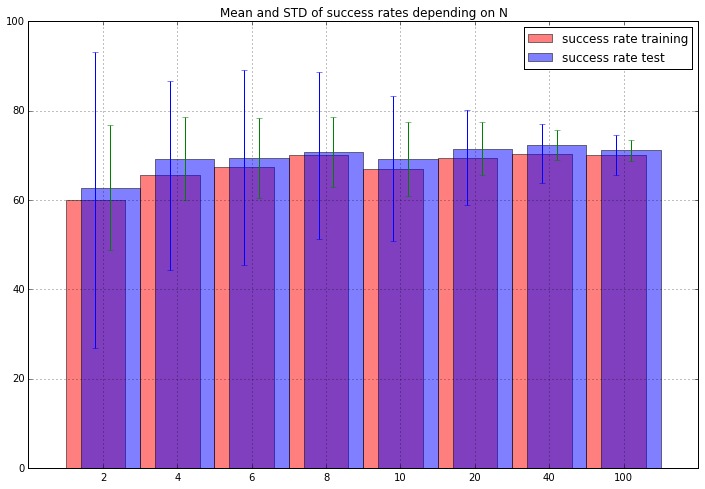

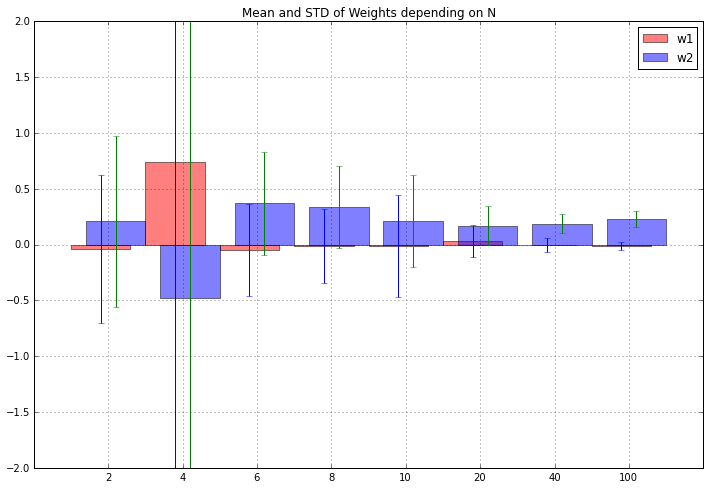

In [15]:
## plot results

## success rates
plt.figure(figsize=(12,8))
xpoints = np.array(range(len(N)))
plt.bar(xpoints-0.5,R_train_mean, color='r', alpha = 0.5, yerr=R_train_std)
plt.bar(xpoints-0.3,R_test_mean, color='b', alpha = 0.5, yerr=R_test_std)
plt.legend(['success rate training','success rate test'])
plt.title('Mean and STD of success rates depending on N')
labels = ['2','4','6','8','10','20','40','100']
plt.xticks(xpoints, labels)
plt.grid()
plt.show()

## weights
plt.figure(figsize=(12,8))
plt.bar(xpoints-0.5,W1_mean, color='r', alpha = 0.5, yerr=W1_std)
plt.bar(xpoints-0.3,W2_mean, color='b', alpha = 0.5, yerr=W2_std)
plt.title('Mean and STD of Weights depending on N')
plt.legend(['w1','w2'])
plt.xticks(xpoints, labels)
plt.ylim([-2,2])
plt.grid()
plt.show()



# 7.3)

### a)
example random experiment, for which the binomialdistribution might be a good model:

- the binomial distribution describes the success rate of n Bernoulli trials with single success probability p
- the red curve in the figure below with $p=0.5$ and $n=150$ is a good model for a random experiment where you throw a coin 150 times and hope to get the number on top each time
- the expected value is the product of p and n so you could expect to get the number on top 75 times 

central properties of binomial distribution, when is it not suitable:

- each trial must be independent with a fixed success probability
- the variance depends on n and p: $\sigma^2 = np(1-p)$
- it's important to know on which factors the probability p depends e.g. if you want to estimate the probability that it rains on a given day you can not simply count the rainy days in a time intervall of n days and divide the number by n because you will get different results for different seasons and regions and the results might be not statistically independent since the probability of rain should be higher if you already got rain the day before because of a low pressure zone passing your home region

//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


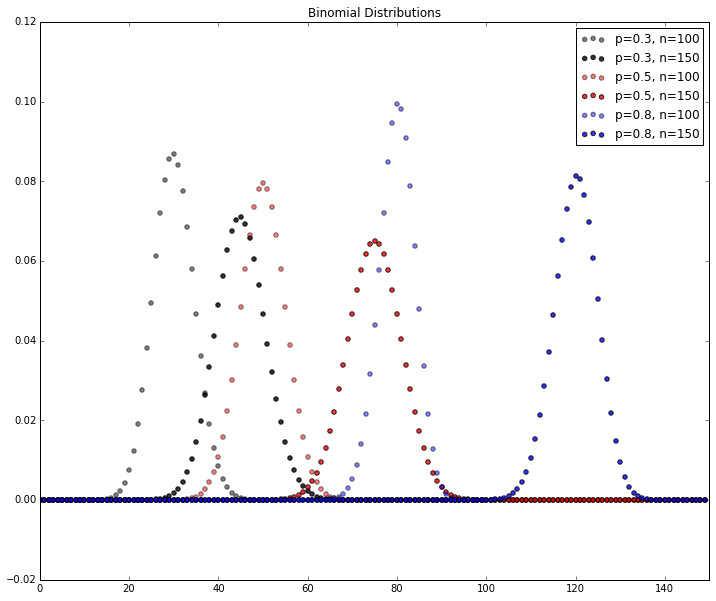

In [1]:

n1 = 100
n2 = 150
k1 = np.array(range(n1))
k2 = np.array(range(n2))
p1 = 0.3
p2 = 0.5
p3 = 0.8

Bn1p1 = scipy.special.binom(n1,k1)*p1**k1*(1-p1)**(n1-k1)
Bn2p1 = scipy.special.binom(n2,k2)*p1**k2*(1-p1)**(n2-k2)
Bn1p2 = scipy.special.binom(n1,k1)*p2**k1*(1-p2)**(n1-k1)
Bn2p2 = scipy.special.binom(n2,k2)*p2**k2*(1-p2)**(n2-k2)
Bn1p3 = scipy.special.binom(n1,k1)*p3**k1*(1-p3)**(n1-k1)
Bn2p3 = scipy.special.binom(n2,k2)*p3**k2*(1-p3)**(n2-k2)

plt.figure(figsize=(12,10))
plt.scatter(k1,Bn1p1,c='k',alpha=0.5)
plt.scatter(k2,Bn2p1,c='k',alpha=0.8)
plt.scatter(k1,Bn1p2,c='r',alpha=0.5)
plt.scatter(k2,Bn2p2,c='r',alpha=0.8)
plt.scatter(k1,Bn1p3,c='b',alpha=0.5)
plt.scatter(k2,Bn2p3,c='b',alpha=0.8)
plt.xlim((0,150))
plt.title('Binomial Distributions')
plt.legend(['p=0.3, n=100','p=0.3, n=150','p=0.5, n=100','p=0.5, n=150','p=0.8, n=100','p=0.8, n=150'])
plt.show()



### b)

- to obtain acceptable results by approximating a binomial distributions with normal distributions, p should be around $0.5$
- good approximations are the blue and the black graphs (p=0.5) in the picture below, while the other graphs with $p=0.05$ cause viewable errors (red)
- the importance of normal distrubutions in nature can be understood by the following relation: the pdf of the sum of independent random variables is calculated by the convolution of the single pdf's. If you have a large number of random variables with uniform distributions (e.g. the locations of gas atoms in a closed space) and you let go n towards infinity, the pdf of the sum of those variables is a convolution of infinite uniform distributions which is equivalent to a normal distribution. Many random processes in nature can be splitted into a huge number of random subprocesses which is the reason why we have normal distributions everywhere.
- the normal distribution would be a good approximation for the example in a) beacause the probability is $0.5$ and

//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


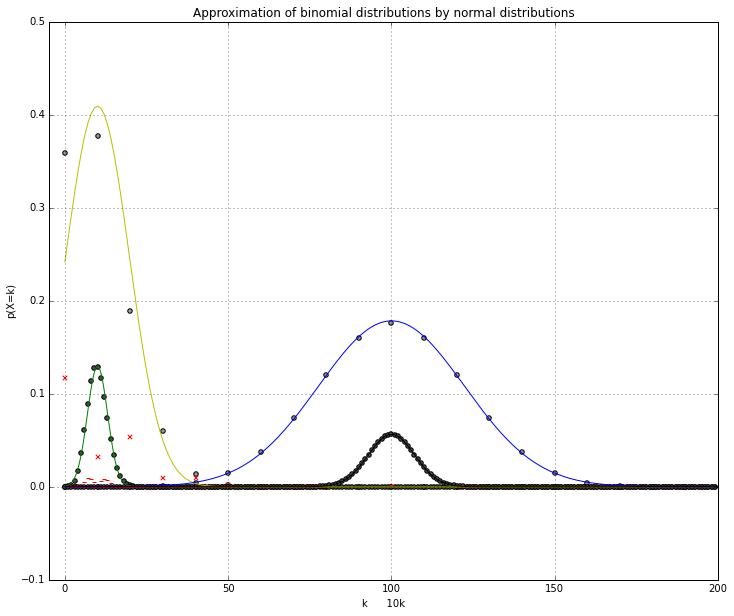

In [89]:
p = 0.05
pp = 0.5
n1 = 20
n2 = 200
k1 = np.array(range(n1))
k2 = np.array(range(n2))

B1 = scipy.special.binom(n1,k1)*p**k1*(1-p)**(n1-k1)
B2 = scipy.special.binom(n2,k2)*p**k2*(1-p)**(n2-k2)
B3 = scipy.special.binom(n1,k1)*pp**k1*(1-pp)**(n1-k1)
B4 = scipy.special.binom(n2,k2)*pp**k2*(1-pp)**(n2-k2)

E1 = n1*p
E2 = n2*p
E3 = n1*pp
E4 = n2*pp
sig1 = np.sqrt(n1*p*(1-p))
sig2 = np.sqrt(n2*p*(1-p))
sig3 = np.sqrt(n1*pp*(1-pp))
sig4 = np.sqrt(n2*pp*(1-pp))

x1 = np.linspace(0,n1,n1*10)
x2 = np.linspace(0,n2,n2*10)

def normdist(x,sig,E):
    return 1/(sig*np.sqrt(2.0*np.pi))*np.exp(-1*np.divide((x-E)**2,2*sig**2)) 

N1 = normdist(x1,sig1,E1)
N2 = normdist(x2,sig2,E2)
N3 = normdist(x1,sig3,E3) 
N4 = normdist(x2,sig4,E4)

plt.figure(figsize=(12,10))

plt.scatter(10*k1,B1,c='0.6')
plt.plot(10*x1,N1,color='y')
plt.scatter(10*k1,np.abs(B1-normdist(k1,sig1,E1)),c='r',marker='x')

plt.scatter(k2,B2,c='0.3')
plt.plot(x2,N2,color='g')
plt.scatter(k2,np.abs(B2-normdist(k2,sig2,E2)),c='r',marker='_')

plt.scatter(10*k1,B3,c='0.6')
plt.plot(10*x1,N3,color='b')
plt.scatter(10*k1,np.abs(B3-normdist(k1,sig3,E3)),c='r',marker='_')

plt.scatter(k2,B4,c='0.3')
plt.plot(x2,N4,color='k')
plt.scatter(k2,np.abs(B4-normdist(k2,sig4,E4)),c='r',marker='_')

plt.title('Approximation of binomial distributions by normal distributions')
plt.xlabel('k      10k')
plt.ylabel('p(X=k)')
plt.xlim((-5,n2))
plt.grid()
plt.show()

### c)

- the Poisson distribution (with $\lambda = pn$) is a good approximation for binomial distributions with sufficiently low success probabilities $p<<0.5$ and large n, as the Poisson theorem states (for $n\rightarrow \infty$ and $p \rightarrow 0$ they are equal)
- it is not suitable for the random experiment above because of the high success probability which is $0.5$
- the example approximations below show that the approximation errors mostly depend on the probability $p$ while the relative errors stay the same with decreasing $n$

//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


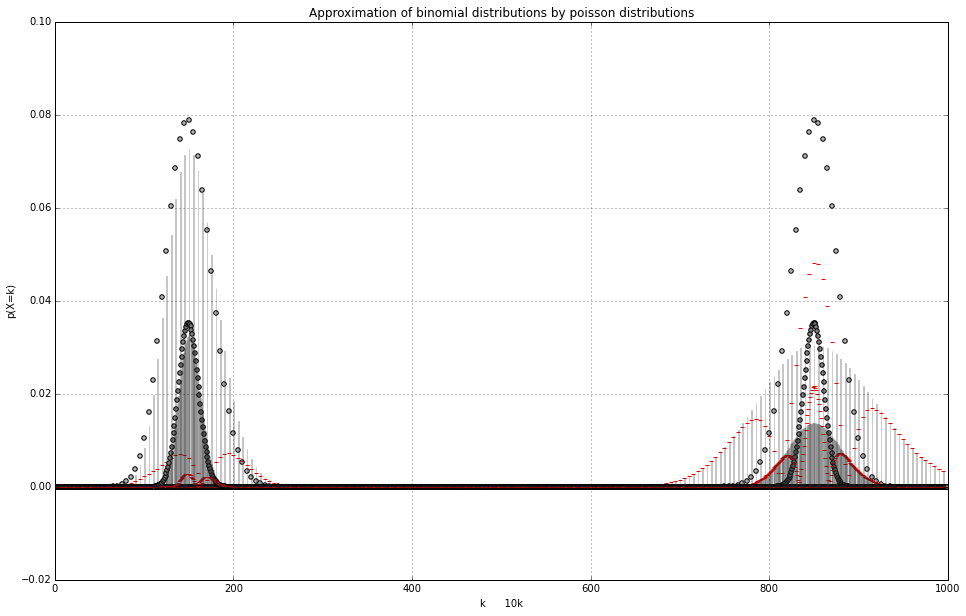

In [67]:
from scipy.stats import poisson

p = 0.85
n1 = 200
n2 = 1000
k1 = np.array(range(n1))
k2 = np.array(range(n2))

pp = 0.15

B1 = scipy.special.binom(n1,k1)*p**k1*(1-p)**(n1-k1)
B2 = scipy.special.binom(n2,k2)*p**k2*(1-p)**(n2-k2)
B3 = scipy.special.binom(n1,k1)*pp**k1*(1-pp)**(n1-k1)
B4 = scipy.special.binom(n2,k2)*pp**k2*(1-pp)**(n2-k2)

lamb1 = n1*p
lamb2 = n2*p
lamb3 = n1*pp
lamb4 = n2*pp
P1 = poisson.pmf(lamb1,k1)
P2 = poisson.pmf(lamb2,k2)
P3 = poisson.pmf(lamb3,k1)
P4 = poisson.pmf(lamb4,k2)

plt.figure(figsize=(16,10))
# n=100, p=0.8
plt.scatter(5*k1,B1,c='0.7')
plt.bar(5*k1,P1,color='0.7',alpha=0.2)
plt.scatter(5*k1,np.abs(B1-P1),c='r',marker='_')
# n=100, p=0.2
plt.scatter(5*k1,B3,c='0.7')
plt.bar(5*k1,P3,color='0.7',alpha=0.2)
plt.scatter(5*k1,np.abs(B3-P3),c='r',marker='_')
# n=1000, p=0.8
plt.scatter(k2,B2,c='0.5')
plt.bar(k2,P2,color='0.5',alpha=0.2)
plt.scatter(k2,np.abs(B2-P2),c='r',marker='_')
# n=1000, p=0.2
plt.scatter(k2,B4,c='0.5')
plt.bar(k2,P4,color='0.5',alpha=0.2)
plt.scatter(k2,np.abs(B4-P4),c='r',marker='_')

plt.title('Approximation of binomial distributions by poisson distributions')
plt.xlabel('k      10k')
plt.ylabel('p(X=k)')
plt.xlim((0.0,1000.0))
plt.grid()
plt.show()
